In [1]:
!pip install yfinance pandas matplotlib seaborn


In [2]:
import yfinance as yf  # Fetch stock data
import pandas as pd  # Data manipulation
import matplotlib.pyplot as plt  # Visualization
import seaborn as sns  # Advanced visualization


In [3]:
# Fetch stock data for Apple (AAPL)
stock_symbol = 'AAPL'
stock_data = yf.download(stock_symbol, start='2015-01-01', end='2024-12-31')

# Display the first few rows
stock_data.head()


[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,,
2015-01-02,24.347170,27.332500,27.860001,26.837500,27.847500,212818400
2015-01-05,23.661278,26.562500,27.162500,26.352501,27.072500,257142000
2015-01-06,23.663496,26.565001,26.857500,26.157499,26.635000,263188400
2015-01-07,23.995310,26.937500,27.049999,26.674999,26.799999,160423600
2015-01-08,24.917269,27.972500,28.037500,27.174999,27.307501,237458000


In [4]:
# Check for missing values
print(stock_data.isnull().sum())

# Drop missing values if any
stock_data.dropna(inplace=True)

# Display summary of the dataset
stock_data.info()


Price      Ticker
Adj Close  AAPL      0
Close      AAPL      0
High       AAPL      0
Low        AAPL      0
Open       AAPL      0
Volume     AAPL      0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2514 entries, 2015-01-02 to 2024-12-27
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Adj Close, AAPL)  2514 non-null   float64
 1   (Close, AAPL)      2514 non-null   float64
 2   (High, AAPL)       2514 non-null   float64
 3   (Low, AAPL)        2514 non-null   float64
 4   (Open, AAPL)       2514 non-null   float64
 5   (Volume, AAPL)     2514 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 137.5 KB


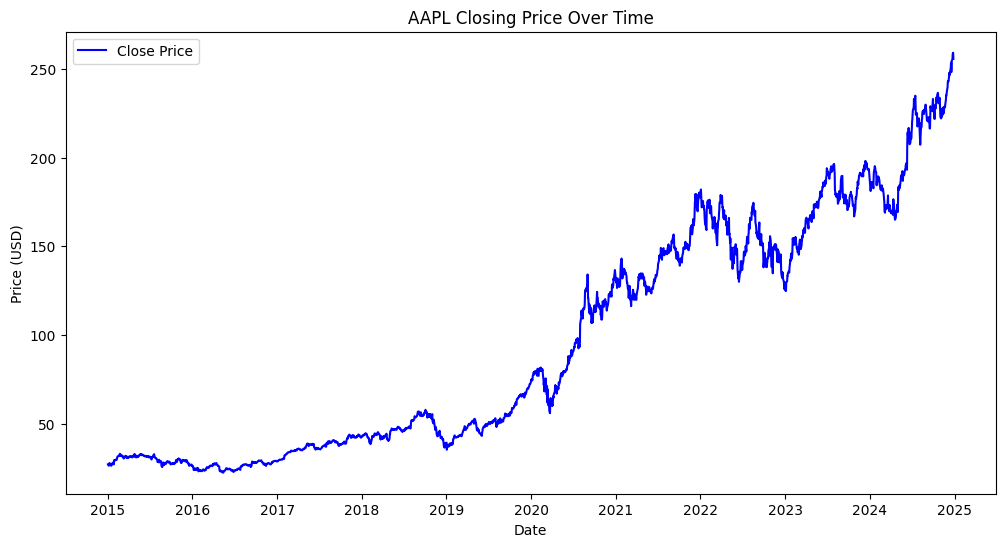

In [5]:
# Plot closing price
plt.figure(figsize=(12, 6))
plt.plot(stock_data['Close'], label='Close Price', color='blue')
plt.title(f'{stock_symbol} Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()


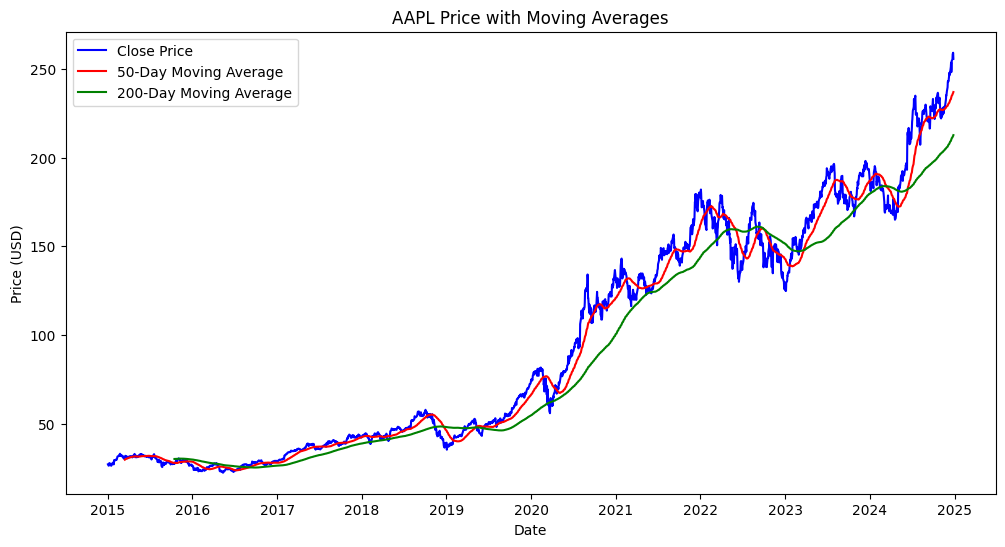

In [6]:
# Calculate moving averages
stock_data['50_MA'] = stock_data['Close'].rolling(window=50).mean()
stock_data['200_MA'] = stock_data['Close'].rolling(window=200).mean()

# Plot the closing price with moving averages
plt.figure(figsize=(12, 6))
plt.plot(stock_data['Close'], label='Close Price', color='blue')
plt.plot(stock_data['50_MA'], label='50-Day Moving Average', color='red')
plt.plot(stock_data['200_MA'], label='200-Day Moving Average', color='green')
plt.title(f'{stock_symbol} Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()


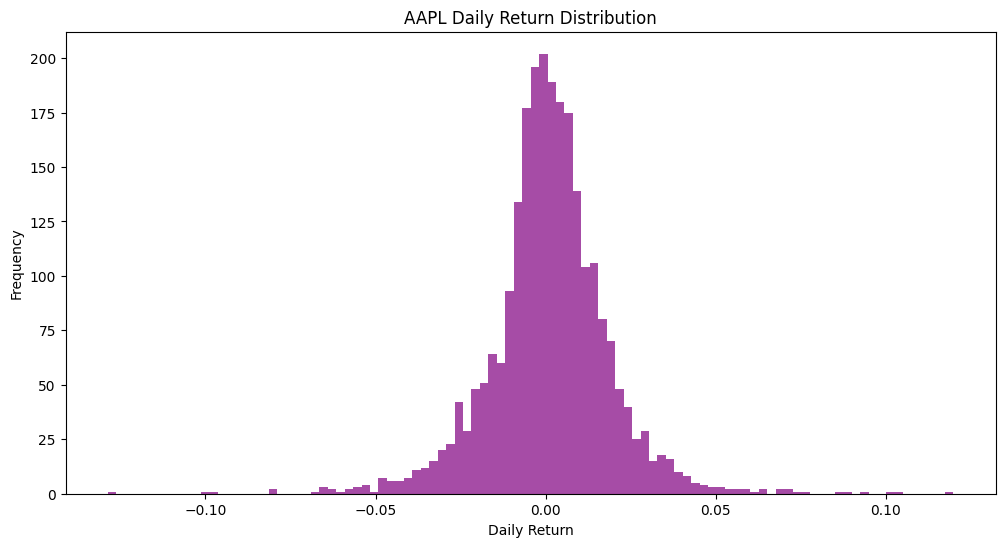

In [7]:
# Calculate daily returns
stock_data['Daily_Return'] = stock_data['Close'].pct_change()

# Plot daily returns
plt.figure(figsize=(12, 6))
stock_data['Daily_Return'].plot(kind='hist', bins=100, color='purple', alpha=0.7)
plt.title(f'{stock_symbol} Daily Return Distribution')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.show()


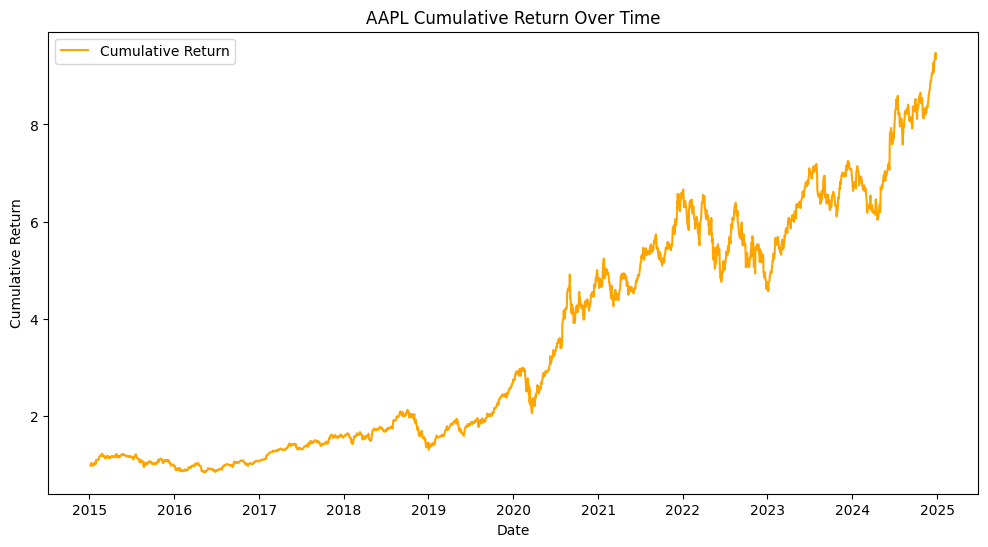

In [8]:
# Calculate cumulative return
stock_data['Cumulative_Return'] = (1 + stock_data['Daily_Return']).cumprod()

# Plot cumulative return
plt.figure(figsize=(12, 6))
plt.plot(stock_data['Cumulative_Return'], label='Cumulative Return', color='orange')
plt.title(f'{stock_symbol} Cumulative Return Over Time')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.show()


In [9]:
# Save data to CSV
from google.colab import files
stock_data.to_csv(f'{stock_symbol}_stock_analysis.csv')
files.download(f'{stock_symbol}_stock_analysis.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[*********************100%***********************]  3 of 3 completed


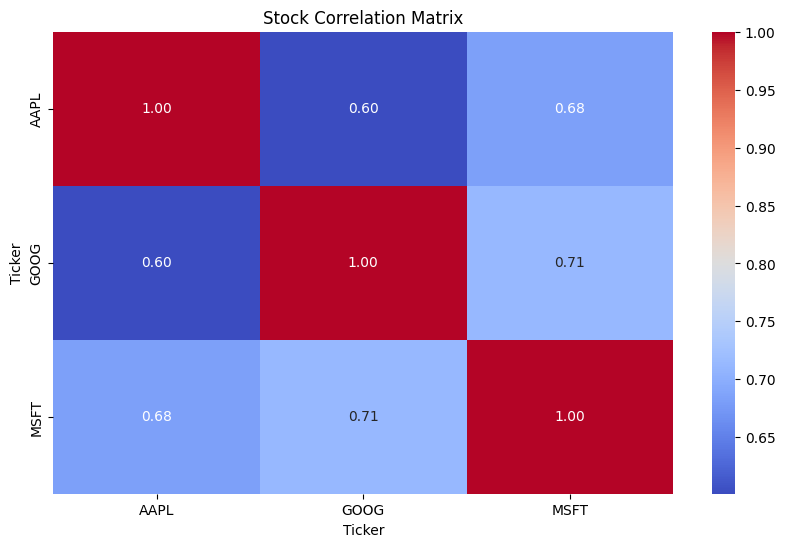

In [10]:
# Fetch data for multiple stocks
stocks = ['AAPL', 'MSFT', 'GOOG']
multi_stock_data = yf.download(stocks, start='2015-01-01', end='2024-12-31')['Adj Close']

# Calculate daily returns
multi_stock_returns = multi_stock_data.pct_change()

# Plot correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(multi_stock_returns.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Stock Correlation Matrix')
plt.show()
